In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
data = pd.read_csv("R:/Projects/New ML Projects/New Iris/Iris.csv")

<Axes: xlabel='Species', ylabel='count'>

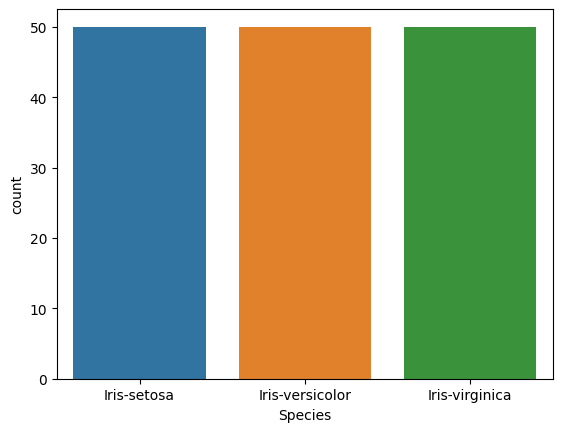

In [7]:
# Visualize the Outcome
sns.countplot(x=data['Species'], data=data)

In [8]:
list=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

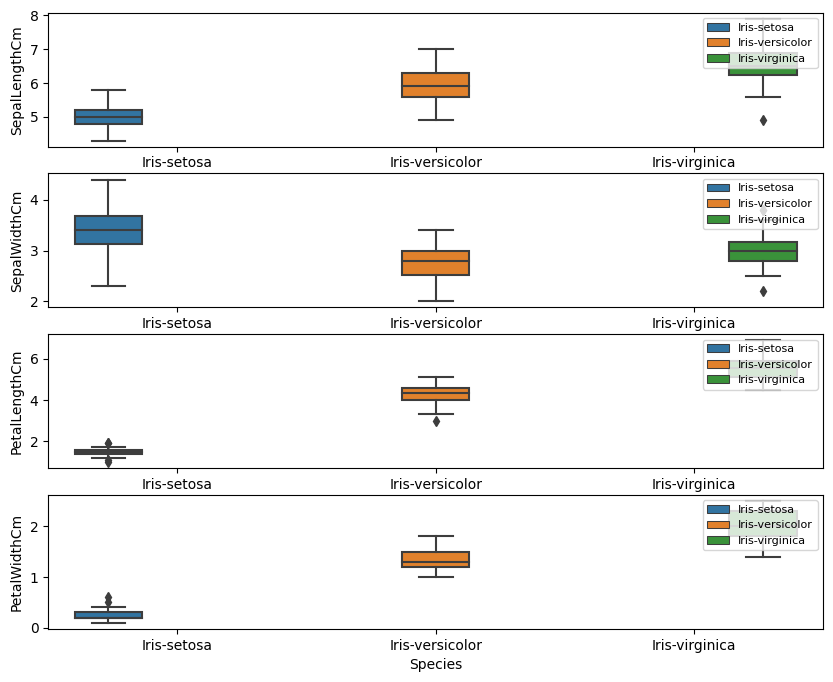

In [9]:
fig, axs = plt.subplots(4, figsize=(10, 8))
for i in range(len(list)):
    sns.boxplot(x=data['Species'], y=data[list[i]], hue=data['Species'], ax=axs[i])
    axs[i].legend(loc='upper right', prop={'size': 8})
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11476\362056387.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig=sns.distplot(data[list[i]],label=list[i])
C:\Users\User\AppData\Local\Temp\ipykernel_11476\362056387.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig=sns.distplot(data[list[i]],label=list[i])
C:\Users

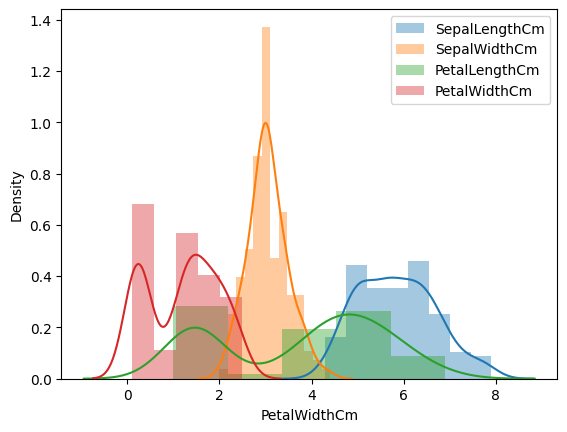

In [10]:
for i in range(len(list)):
    
    fig=sns.distplot(data[list[i]],label=list[i])
    fig.legend()

In [11]:
species=data['Species'].unique()

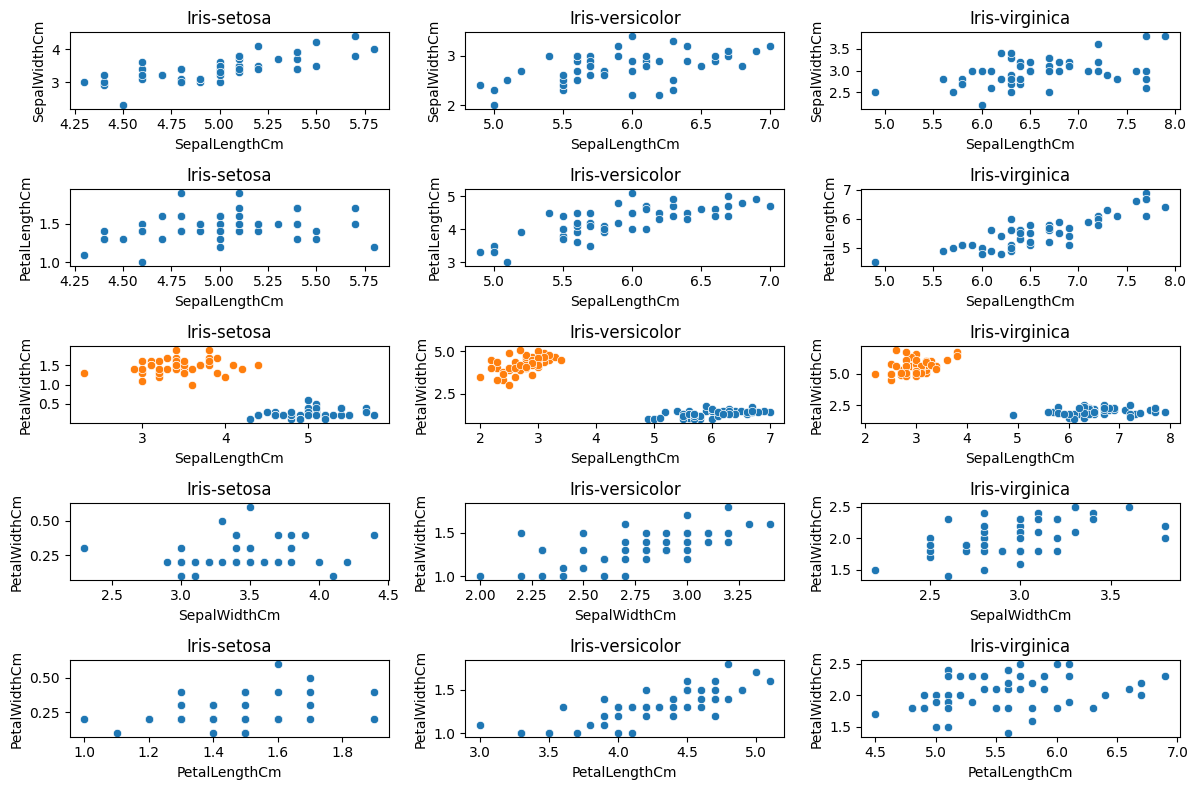

In [13]:
fig, axes = plt.subplots((len(list) + 1), data['Species'].nunique(), figsize=(12, 8))
axes = axes.flatten()
for j in range(0, len(list)-1):
    for k in range(j+1, len(list)):
        for l, i in enumerate(species):
            ax = axes[(j + k - 1) * data['Species'].nunique() + l]
            sns.scatterplot(data=data[data['Species'] == i], x=list[j], y=list[k], ax=ax)
            ax.set_title(i)
plt.tight_layout()
plt.show()

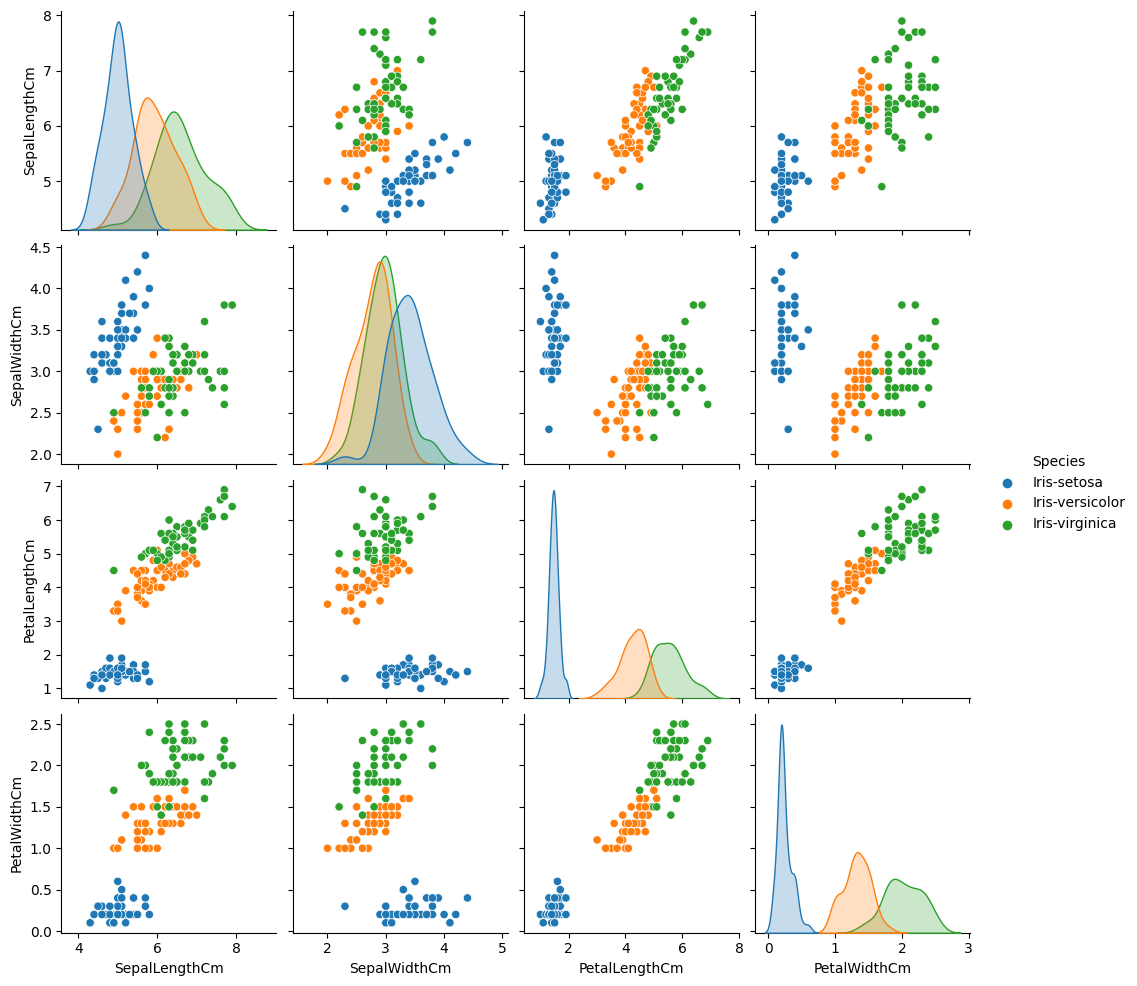

In [18]:
sns.pairplot(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']], hue="Species")

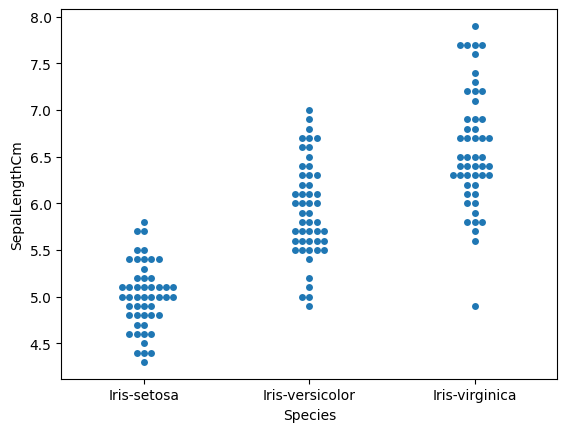

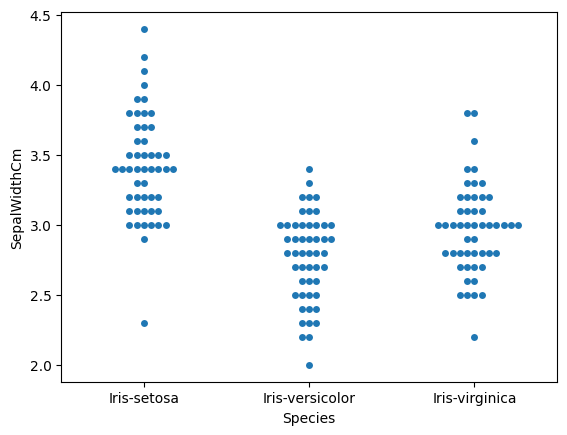

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


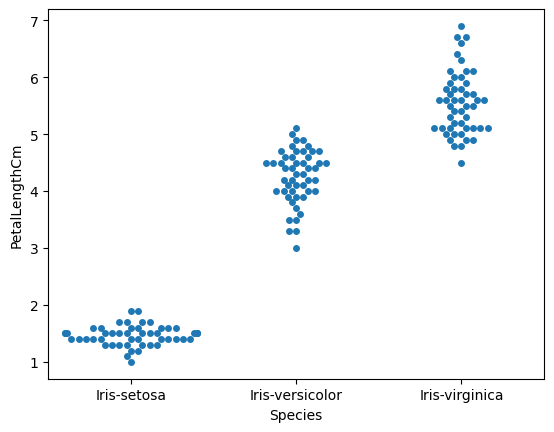

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


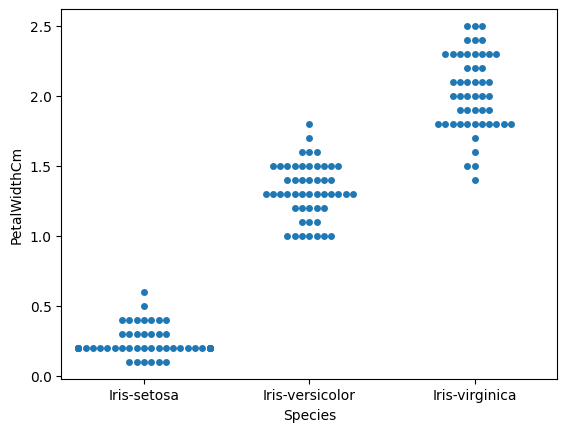

In [19]:
for i in list:
    sns.swarmplot(x=data['Species'],y=data[i])
    plt.show() 

In [20]:
# Developing a ML model 
X=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=data['Species']
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y)
#deploy ML algorithms
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    print("Classifiers: ", classifier.__class__.__name__)
    print(metrics.classification_report(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))

Classifiers:  LogisticRegression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

[[10  0  0]
 [ 0 12  0]
 [ 0  0 16]]
Classifiers:  KNeighborsClassifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

[[10  0  0]
 [ 0 12  0]
 [ 0  0 16]]
Classifiers:  SVC
                 precision    recall